
# Visualization (Part 6): Image tutorial

A short tutorial on plotting images with Matplotlib.

Link:  
 - https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


## Importing image data into Numpy arrays

Matplotlib relies on the Pillow_ library to load image data.


Here's the image we're going to play with:

<img src="stinkbug.png">

It's a 24-bit RGB PNG image (8 bits for each of R, G, B).  Depending
on where you get your data, the other kinds of image that you'll most
likely encounter are RGBA images, which allow for transparency, or
single-channel grayscale (luminosity) images.

In [2]:
img = mpimg.imread('https://raw.githubusercontent.com/matplotlib/matplotlib/master/doc/_static/stinkbug.png')
print("Image shape: ", img.shape)
print("The first pixel: ", img[0,0,:],"\n")
print(img)

Image shape:  (375, 500, 3)
The first pixel:  [0.40784314 0.40784314 0.40784314] 

[[[0.40784314 0.40784314 0.40784314]
  [0.40784314 0.40784314 0.40784314]
  [0.40784314 0.40784314 0.40784314]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]]

 [[0.4117647  0.4117647  0.4117647 ]
  [0.4117647  0.4117647  0.4117647 ]
  [0.4117647  0.4117647  0.4117647 ]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]]

 [[0.41960785 0.41960785 0.41960785]
  [0.41568628 0.41568628 0.41568628]
  [0.41568628 0.41568628 0.41568628]
  ...
  [0.43137255 0.43137255 0.43137255]
  [0.43137255 0.43137255 0.43137255]
  [0.43137255 0.43137255 0.43137255]]

 ...

 [[0.4392157  0.4392157  0.4392157 ]
  [0.43529412 0.43529412 0.43529412]
  [0.43137255 0.43137255 0.43137255]
  ...
  [0.45490196 0.45490196 0.45490196]
  [0.4509804  0.4509804  0.4509804 ]
  [0.4509804  0.4509804  0.450

## Plotting numpy arrays as images

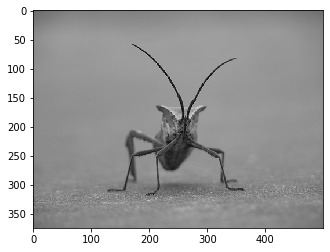

In [3]:
imgplot = plt.imshow(img)

You can also plot any numpy array.


### Applying pseudocolor schemes to image plots

Pseudocolor can be a useful tool for enhancing contrast and
visualizing your data more easily.  This is especially useful when
making presentations of your data using projectors - their contrast is
typically quite poor.

Pseudocolor is only relevant to single-channel, grayscale, luminosity
images.  We currently have an RGB image.  Since R, G, and B are all
similar (see for yourself above or in your data), we can just pick one
channel of our data:



Image shape:  (375, 500)
The first pixel:  0.40784314 



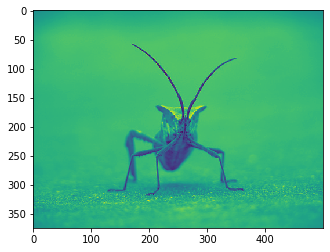

In [22]:
lum_img = img[:, :, 0]
print("Image shape: ", lum_img.shape)
print("The first pixel: ", lum_img[0,0],"\n")
#print(lum_img)

plt.imshow(lum_img)

Now, with a luminosity (2D, no color) image, the default colormap (aka lookup table,
LUT), is applied.  The default is called viridis.  There are plenty of
others to choose from.

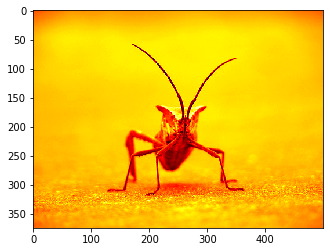

In [5]:
plt.imshow(lum_img, cmap="hot")

Note that you can also change colormaps on existing plot objects using `set_cmap` method:



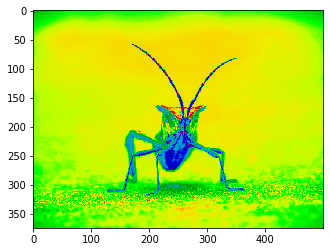

In [30]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

#plt.imshow(lum_img, cmap =('nipy_spectral'))

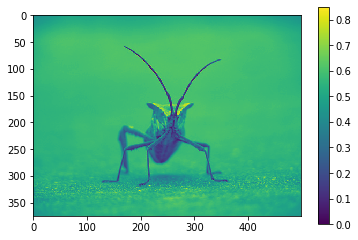

In [31]:
# adding color bar
imgplot = plt.imshow(lum_img)
plt.colorbar()


### Examining a specific data range

Sometimes you want to enhance the contrast in your image, or expand
the contrast in a particular region while sacrificing the detail in
colors that don't vary much, or don't matter.  A good tool to find
interesting regions is the histogram.  To create a histogram of our
image data, we use the :func:`~matplotlib.pyplot.hist` function.



(array([2.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 7.000e+00, 9.000e+00, 7.000e+00, 2.000e+00,
        7.000e+00, 1.000e+01, 1.100e+01, 1.500e+01, 1.400e+01, 2.700e+01,
        2.100e+01, 2.400e+01, 1.400e+01, 3.100e+01, 2.900e+01, 2.800e+01,
        2.400e+01, 2.400e+01, 4.000e+01, 2.600e+01, 5.200e+01, 3.900e+01,
        5.700e+01, 4.600e+01, 8.400e+01, 7.600e+01, 8.900e+01, 8.000e+01,
        1.060e+02, 1.130e+02, 1.120e+02, 9.000e+01, 1.160e+02, 1.090e+02,
        1.270e+02, 1.350e+02, 9.800e+01, 1.310e+02, 1.230e+02, 1.110e+02,
        1.230e+02, 1.160e+02, 1.010e+02, 1.170e+02, 1.000e+02, 1.010e+02,
        9.000e+01, 1.060e+02, 1.260e+02, 1.040e+02, 1.070e+02, 1.110e+02,
        1.380e+02, 1.000e+02, 1.340e+02, 1.210e+02, 1.400e+02, 1.320e+02,
        1.390e+02, 1.160e+02, 1.330e+02, 1.180e+02, 1.080e+02, 1.170e+02,
        1.280e+02, 1.200e+02, 1.210e+02, 1.100e+02, 1.160e+02, 1.180e+02,
        9.700e+01, 9.700e+01, 1.140e+0

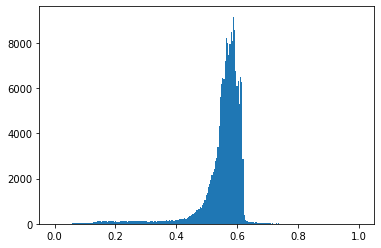

In [32]:
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 1.0))

Most often, the "interesting" part of the image is around the peak,
and you can get extra contrast by clipping the regions above and/or
below the peak.  In our histogram, it looks like there's not much
useful information in the high end (not many white things in the
image).  Let's adjust the upper limit, so that we effectively "zoom in
on" part of the histogram.  We do this by passing the clim argument to
imshow.  You could also do this by calling the
:meth:`~matplotlib.cm.ScalarMappable.set_clim` method of the image plot
object, but make sure that you do so in the same cell as your plot
command when working with the Jupyter Notebook - it will not change
plots from earlier cells.

You can specify the clim in the call to ``plot``.



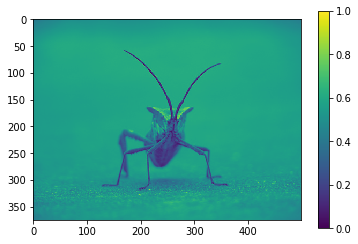

In [41]:
imgplot = plt.imshow(lum_img, clim=(0, 1))
#imgplot = plt.imshow(lum_img, clim=(0, 10))
plt.colorbar()

You can also specify the clim using the returned object



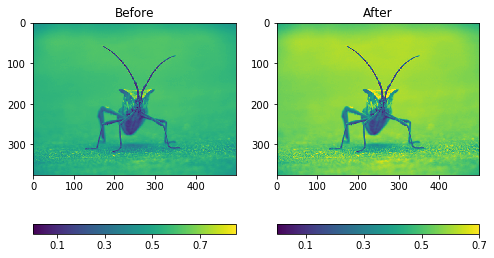

In [33]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(lum_img)
ax.set_title('Before')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(lum_img)
imgplot.set_clim(0.0, 0.7)
ax.set_title('After')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

### Array Interpolation schemes

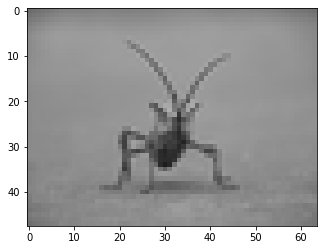

In [45]:
from PIL import Image

img = Image.open('stinkbug.png')
img.thumbnail((64, 64), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img)

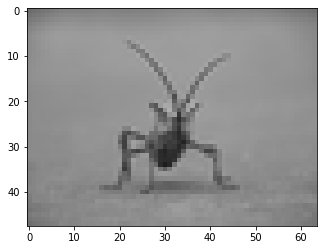

In [46]:
imgplot = plt.imshow(img, interpolation="nearest")

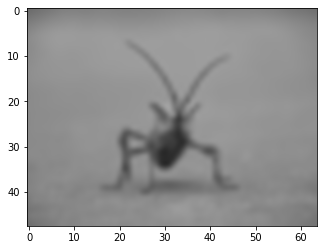

In [49]:
# Bicubic interpolation is often used when blowing up photos 
# - people tend to prefer blurry over pixelated.
imgplot = plt.imshow(img, interpolation="bicubic")

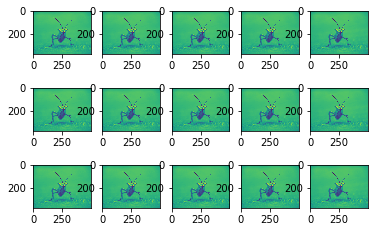

In [11]:
fig, ax = plt.subplots(3, 5)
#fig.subplots_adjust(hspace=0.1, wspace=0.1)
#print (fig, ax)

for i , ax in enumerate(ax.flat):
        imgplot = ax.imshow(lum_img, interpolation='nearest')
        #ax.set(xticks=[], yticks=[])
        #imgplot.set_clim(0.1*i, 0.1*j)

## Person images

In [12]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=6)

# print out dataset information
print(len(faces.target_names))
print(faces.images.shape)

142
(3507, 62, 47)


In [13]:
# the first image information
print(faces.images[0].shape)
print(faces.images[0])

(62, 47)
[[124.        96.333336 107.333336 ... 125.333336 111.333336  95.      ]
 [133.66667  100.333336 114.       ... 120.666664 110.        98.      ]
 [150.66667  111.666664 121.333336 ... 115.666664 103.        95.      ]
 ...
 [131.66667  125.       117.666664 ... 227.33333  234.33333  237.66667 ]
 [121.       116.       110.333336 ... 230.66667  234.66667  234.33333 ]
 [110.666664 109.       105.       ... 227.66667  235.       238.      ]]


Text(0.5, 0, 'Tom Ridge')

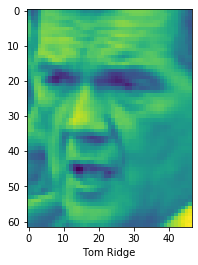

In [14]:
# display the first image
plt.imshow(faces.images[0])
plt.xlabel(faces.target_names[faces.target[0]])

Let's plot a few of these faces to see what we're working with:

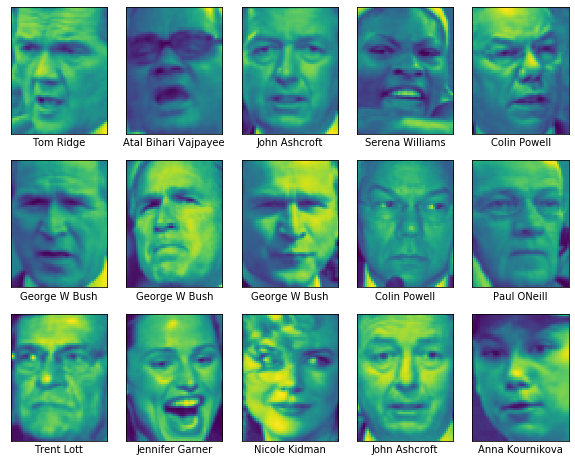

In [15]:
fig, ax = plt.subplots(3, 5, figsize=(10,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i]) # , cmap='bone'
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])
    #axi.set(xlabel=faces.target_names[faces.target[i]])

## cmap in imshow

**Note**: When img has shape (M,N,3) or (M,N,4), the values in img are interpreted as RGB or RGBA values. In this case the cmap is ignored. However, if img were an array of shape (M,N), then the cmap controls the colormap used to display the values.

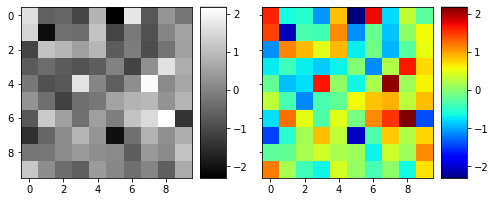

In [26]:

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1 as axes_grid1
np.random.seed(1)

data = np.random.randn(10, 10)

fig = plt.figure(figsize=(8, 5))
grid = axes_grid1.AxesGrid(
    fig, 111, nrows_ncols=(1, 2), axes_pad = 0.5, cbar_location = "right",
    cbar_mode="each", cbar_size="15%", cbar_pad="5%",)

# the left one (gray)
im0 = grid[0].imshow(data, cmap='gray', interpolation='nearest')
grid.cbar_axes[0].colorbar(im0)

# the right one (color)
im1 = grid[1].imshow(data, cmap='jet', interpolation='nearest')
grid.cbar_axes[1].colorbar(im1)
plt.savefig('test.png', bbox_inches='tight', pad_inches=0.0, dpi=200,)